In [16]:
import pandas as pd

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', 20)
df = pd.read_csv("TripA02.csv", sep=";", encoding="latin1")

def verificar_condicao_bateria(row):
    if row['Battery Voltage [V]'] < 12.0:
        return 0 
    elif row['Battery Temperature [°C]'] > 60.0:
        return 0 
    elif row['SoC [%]'] < 20.0:
        return 0 
    elif row['Battery Current [A]'] < -100 or row['Battery Current [A]'] > 100:
        return 0
   
    return 1 
df = df.loc[:, ~(df == 0).all()]
df['Condição'] = df.apply(verificar_condicao_bateria, axis=1)
df.head(50)


,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],SoC [%],displayed SoC [%],min. SoC [%],max. SoC [%),Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C],Condição
0,0.0,96.89,589.0,45.50,14.00,0.09,0.0,381.80,-37.60,23.0,23.0,80.30,92.0,8,90,0.0,85,1.04,1,32.0,5.0,22.84,1
1,0.1,96.87,589.0,45.61,15.00,0.11,0.0,381.80,-37.62,23.0,23.0,80.30,92.0,8,90,0.0,85,1.04,1,32.0,5.0,22.84,1
2,0.2,96.81,589.0,45.50,15.32,0.09,0.0,381.80,-37.67,23.0,23.0,80.30,92.0,8,90,0.0,85,1.04,1,32.0,5.0,22.84,1
3,0.3,96.74,589.0,45.50,15.18,-0.01,0.0,381.82,-37.65,23.0,23.0,80.30,92.0,8,90,0.0,85,1.04,1,32.0,5.0,22.84,1
4,0.4,96.72,589.0,45.50,15.50,0.01,0.0,381.87,-37.50,23.0,23.0,80.30,92.0,8,90,0.0,85,1.04,1,32.0,5.0,22.84,1
5,0.5,96.68,589.0,45.45,15.00,0.07,0.0,381.90,-37.29,23.0,23.0,80.30,92.0,8,90,0.0,85,1.04,1,32.0,5.0,22.84,1
6,0.6,96.65,589.0,45.35,15.32,-0.01,0.0,381.90,-36.94,23.0,23.0,80.30,92.0,8,90,0.0,85,1.04,1,32.0,5.0,22.84,1
7,0.7,96.58,589.0,45.20,14.68,-0.08,0.0,381.92,-36.53,23.0,23.0,80.30,92.0,8,90,0.0,85,1.03,1,32.0,5.0,22.84,1
8,0.8,96.55,589.0,45.30,14.18,0.02,0.0,381.97,-35.98,23.0,23.0,80.30,92.0,8,90,0.0,85,1.01,1,32.0,5.0,22.84,1
9,0.9,96.52,589.0,45.35,14.50,0.03,0.0,381.98,-35.81,23.0,23.0,80.30,92.0,8,90,0.0,85,1.00,1,32.0,5.0,22.84,1


Nessa codigo de carreguei a tabela
fiz uma verificação para ver se a bateria esta boa com base em algumas colunas
excluir todas linhas que tem valor 0
e setei a condição ao dataset

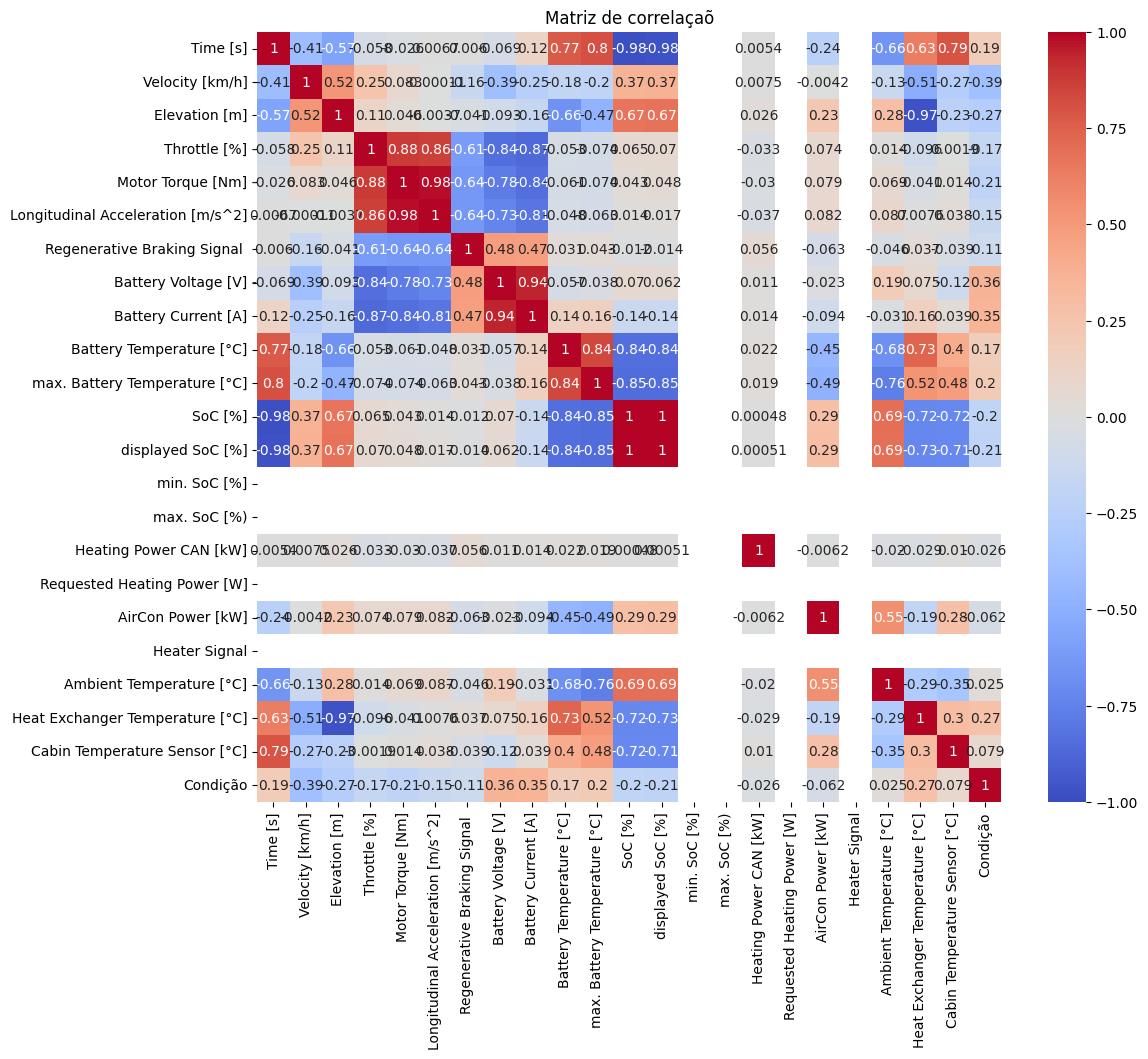

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_correlacao = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlaçaõ")
plt.show()

Aqui mostrei a matriz de correlações afim de ver quais colunas esta mais relacionadas

In [6]:
from sklearn.model_selection import train_test_split

x = df[["Velocity [km/h]", "Battery Voltage [V]", "Battery Current [A]", "Heat Exchanger Temperature [°C]", "Motor Torque [Nm]", "Battery Temperature [°C]"]]
y = df['Condição']   

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


Atravez da matriz verifique que as seguintes colunas estão mais relacionadas com a condição
"Velocity [km/h]", "Battery Voltage [V]", "Battery Current [A]", "Heat Exchanger Temperature [°C]", "Motor Torque [Nm]", "Battery Temperature [°C]"

e coloquei o x com as colunas que estão mais relacionadas
e o y como a condição

e dividi o conjunto como testes e treinos

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

Aqui trenei a IA
com x train e o y train

In [8]:
y_predicoes = lda.predict(x_test) 

Fiz as predições para testa com o x teste

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [10]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=[0, 1])

<Figure size 1500x500 with 0 Axes>

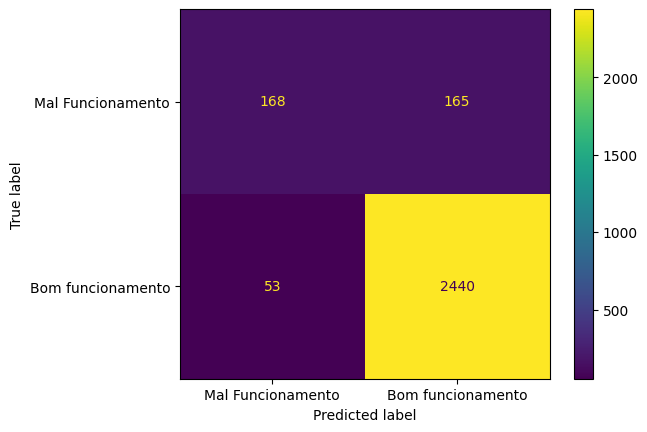

In [11]:
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=["Mal Funcionamento", "Bom funcionamento"])
disp.plot(values_format='d') 

Aqui criei a matriz de confusão para ver quais ele acertou e errou, pude verificar que ele ta errando bastante o 0 que é mal funcionamento da bateria

In [12]:
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

           0       0.76      0.50      0.61       333
           1       0.94      0.98      0.96      2493

    accuracy                           0.92      2826
   macro avg       0.85      0.74      0.78      2826
weighted avg       0.92      0.92      0.92      2826



mostrei as classificação e vi que esta com acurracy de 92 mas esta errando bastante o de mal funcionamento do motor

creio que esse erro esta sendo pois tenho menos informações de bateria com mal funcionamento

In [13]:
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 

0.9228591648973815

In [14]:
import joblib
joblib.dump(lda, 'modelo_lda.joblib')

['modelo_lda.joblib']